In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import skew
import seaborn as sns 
from scipy.stats import norm
from scipy.stats import chi2_contingency
import statsmodels.api as sm

In [3]:
file_path = "/Users/jakey/DSC530 - Data Exploration and Analysis/DSC530-Final-Project/Titanic-Dataset.csv"

In [4]:
titanic_df = pd.read_csv(file_path)

In [5]:
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Description of non-apparent variables:

Survived -- 0 = no, 1 = yes
Pclass (Ticket class) -- 1st, 2nd, and 3rd class
SibSp (# of siblings/spouses aboard)
Parch (# of parents/children aboard)
Embarked (from) -- C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
vars = list(titanic_df.columns)
print(vars)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [7]:
vars.remove('Name')
vars.remove('Ticket')
vars.remove('Cabin')
vars.remove('PassengerId')
vars.remove('Embarked')
print(vars)

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


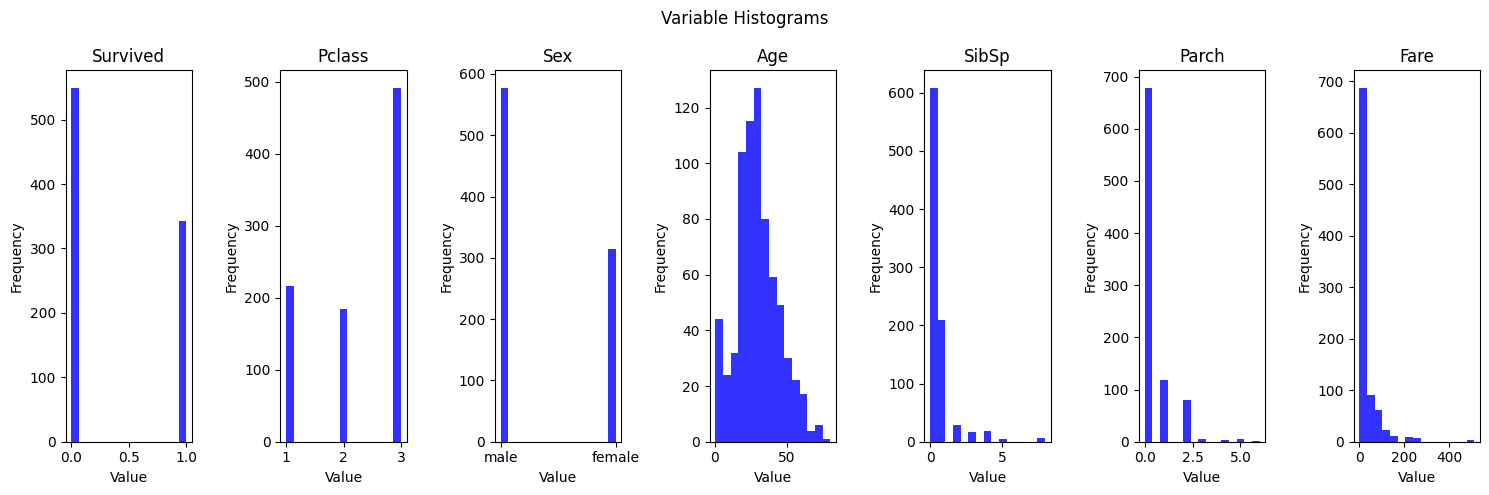

In [8]:
fig, axs = plt.subplots(1, len(vars), figsize = (15, 5))
fig.suptitle('Variable Histograms')
axs = axs.flatten()
for i, var in enumerate(vars) :
    axs[i].hist(titanic_df[var], bins=15, color='blue', alpha=0.8)
    axs[i].set_title(f'{var}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

From the histograms we have made of our chosen variables, there do not appear to be any dramatic outliers. Indeed, since we are attempting to identify any and all possible patterns in the survivors of the Titanic, I do not think it is appropriate to exclude any outliers since all extreme values in age or fare, though they may be rare, are still valid and could offer significant insights. If we were interested in building a predictive model of who we think might survive shipwrecks today, we may want to consider removing outliers to help the model better generalize but that is not the aim of this project. 

In [9]:
summary = titanic_df.describe(include = 'all')
print(summary)

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000  891.000000 

In [10]:
numeric_vars = vars
numeric_vars.remove('Sex')

In [11]:
for i, var in enumerate(numeric_vars) :
    if np.issubdtype(titanic_df[var].dtype, np.number) :
        cleaned_var = titanic_df[var].dropna() # Note: removing NaN values so stuff like age mode is not nan
        mode = stats.mode(cleaned_var)
        variance = np.var(cleaned_var)
        std_dev = np.std(cleaned_var)
        skew_value = skew(cleaned_var)

        print(f'{var} mode : {mode}\n'
              f'{var} variance : {variance}\n'
              f'{var} standard deviation : {std_dev}\n'
              f'{var} skew : {skew_value}\n\n')

Survived mode : ModeResult(mode=np.int64(0), count=np.int64(549))
Survived variance : 0.23650647893072133
Survived standard deviation : 0.48631931786709987
Survived skew : 0.4777174662568536


Pclass mode : ModeResult(mode=np.int64(3), count=np.int64(491))
Pclass variance : 0.6982305912347064
Pclass standard deviation : 0.8356019334795166
Pclass skew : -0.6294858816096934


Age mode : ModeResult(mode=np.float64(24.0), count=np.int64(30))
Age variance : 210.72357975366617
Age standard deviation : 14.516321150817316
Age skew : 0.3882898514698657


SibSp mode : ModeResult(mode=np.int64(0), count=np.int64(608))
SibSp variance : 1.2146782704208816
SibSp standard deviation : 1.1021244350892878
SibSp skew : 3.6891276847759507


Parch mode : ModeResult(mode=np.int64(0), count=np.int64(678))
Parch variance : 0.6489990313409693
Parch standard deviation : 0.8056047612452208
Parch skew : 2.7444867379203735


Fare mode : ModeResult(mode=np.float64(8.05), count=np.int64(43))
Fare variance : 2466.665

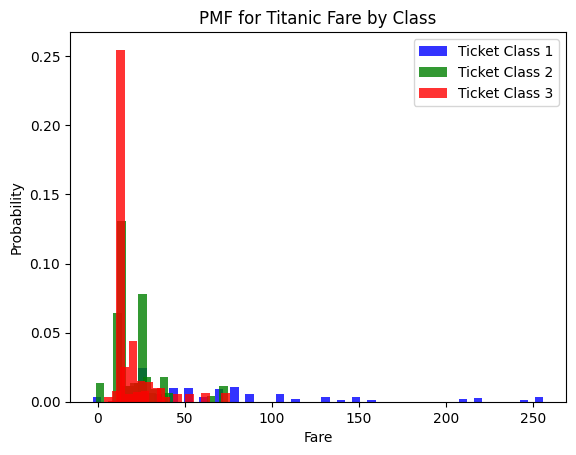

In [12]:
fare_no_outliers = titanic_df[titanic_df['Fare'] <= 500]

colors = {1 : 'blue', 2 : 'green', 3 : 'red'}
bins = 30
bar_width = 5

for pclass in [1, 2, 3] :
    fare_by_class = fare_no_outliers[fare_no_outliers['Pclass'] == pclass]['Fare']
    counts, bin_edges = np.histogram(fare_by_class, bins = bins, density = True) # making a binned histogram
    bin_middles = (bin_edges[:-1] + bin_edges[1:]) / 2 # calculates the middlepoint of each bin for fare
    offset = (pclass - 2) * bar_width
    plt.bar(bin_middles + offset, counts, width = bar_width, align = 'center', 
            color = colors[pclass], alpha = .8, label = f'Ticket Class {pclass}')

plt.xlabel('Fare')
plt.ylabel('Probability')
plt.title('PMF for Titanic Fare by Class')
plt.legend()
plt.show()

In [13]:
mean_fares = titanic_df.groupby('Pclass')['Fare'].mean()
print(mean_fares)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [14]:
fares_over_500 = titanic_df[titanic_df['Fare'] > 500]
count_fares_over_500 = fares_over_500.groupby('Pclass').size()
print(count_fares_over_500)

Pclass
1    3
dtype: int64


By getting rid of instances of fares > $500, the PMF looks much better. It is clear the majority of tickets were for 3rd class passengers, a handful of 2nd class passengers with slightly more expensive fares, and 1st class passenger fares that have much larger variance in price but all are significantly more expensive than the other two classes. This is what we would expect to see. 

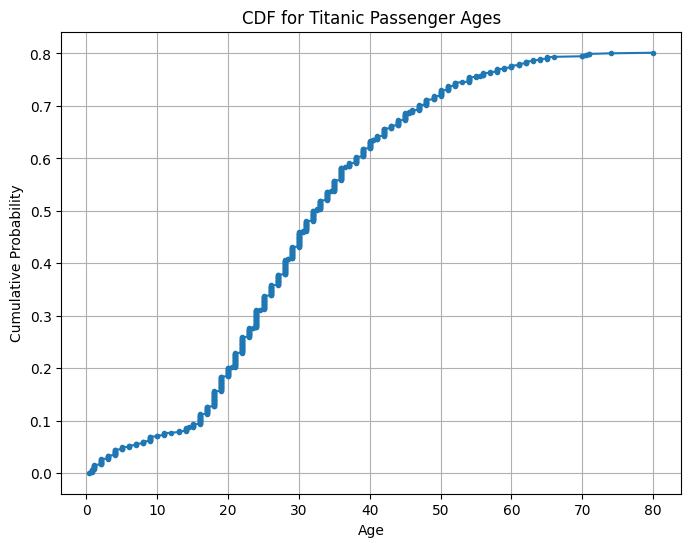

In [15]:
sorted_age = np.sort(titanic_df['Age'])
cdf = np.arange(1, len(sorted_age)+1) / len(sorted_age)

plt.figure(figsize=(8, 6))
plt.plot(sorted_age, cdf, marker='.', linestyle='-')
plt.title('CDF for Titanic Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

Above is the cumulative distribution function for passenger ages on the Titanic. From this CDF we can tell that the Titanic carried a significant number of younger passengers. For instance, we can infer from the CDF that just about a 3rd of passengers on the Titanic were 25 years old or younger. Additionally, a quick google search informs us that the average life expectancy of both Americans and the British when the Titanic sank in 1912 was between 51 and 55 years. From this CDF we can see that just about 25% of Titanic passengers were over the average life expectancy of 55 years. This finding suggests that, though a considerable proportion of Titanic passengers were elderly, the ship's demographics tended more towards younger (and possibly more affluent) passengers. This fits nicely with what we already know about the Titanic-- that it was a luxury ocean liner that likely carried younger, affluent passengers who were more likely to travel. 

To see if this hunch is correct, I'll plot a normal distribution with our age data to see if it is a good fit. 

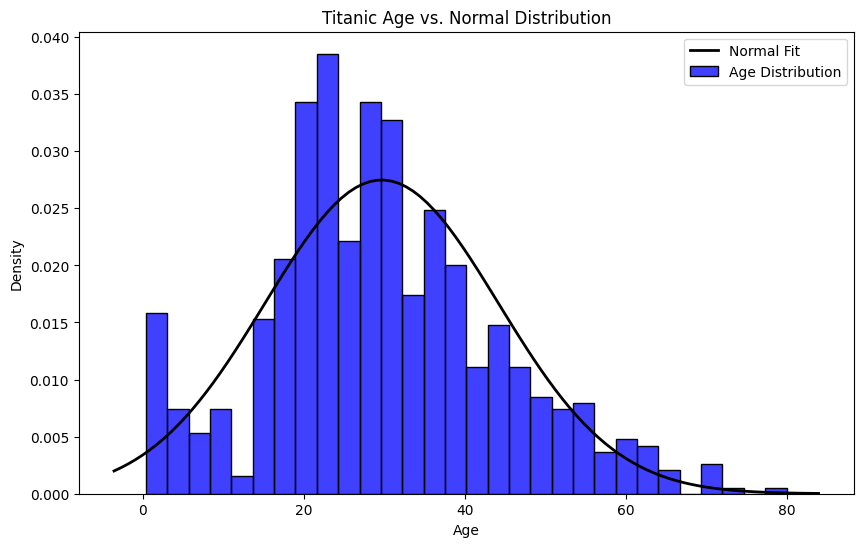

In [16]:
age = titanic_df['Age'].dropna()

plt.figure(figsize=(10,6))
sns.histplot(age, kde=False, bins=30, color='blue', stat='density', label='Age Distribution')

mu, std = norm.fit(age)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)  
p = norm.pdf(x, mu, std)  # calculate normal distribution values

plt.plot(x, p, 'k', linewidth = 2, label = 'Normal Fit')
plt.title('Titanic Age vs. Normal Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

The normal curve above is clearly not a good fit to model the ages of Titanic passengers. It appears there were far fewer 4-7 year olds than would be expected from a normal distribution. There also appears to be a disproportionate number of passengers in their early 20's and 30's which we suspected. This finding fits with our understanding of the context of the situation. Namely, younger and richer people who were more likely to travel were probably overrepresented on the Titanic, especially in the context of the second Industrial Revolution supplying both greater population growth and opportunity. 

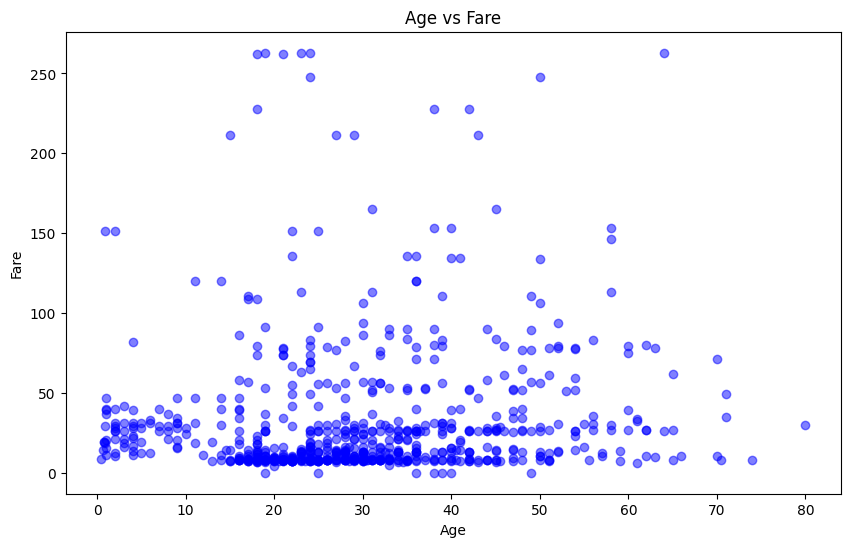

In [17]:
titanic_filtered = titanic_df[titanic_df['Fare'] <= 500]
plt.figure(figsize=(10,6))
plt.scatter(titanic_filtered['Age'], titanic_filtered['Fare'], alpha=0.5, color='blue')
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

The above scatter plot was made excluding fares over 500 for the sake of readability. Despite that transformation, it is still hard to get a decent read of what is truly being depicted.  Here is the same plot but with fare on a logarithmic scale instead of linear:

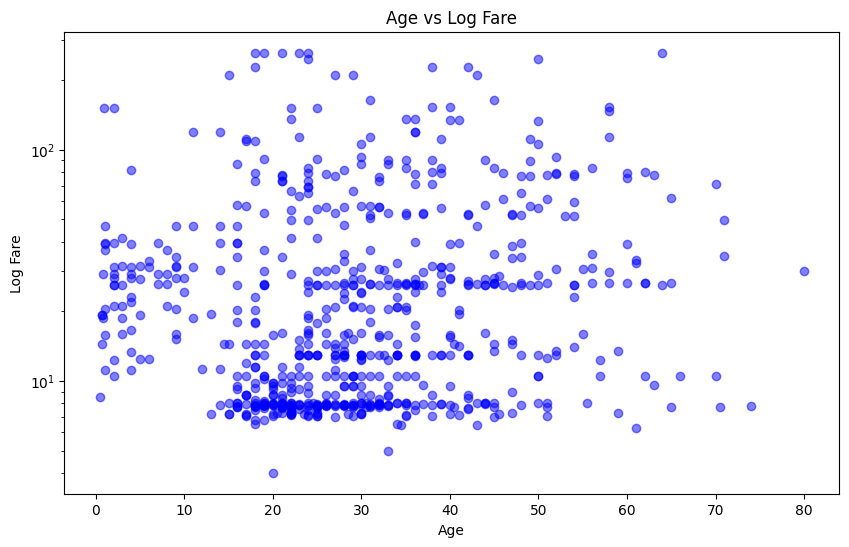

In [18]:
titanic_filtered = titanic_df[titanic_df['Fare'] <= 500]
plt.figure(figsize=(10,6))
plt.scatter(titanic_filtered['Age'], titanic_filtered['Fare'], alpha=0.5, color='blue')
plt.yscale('log')
plt.title('Age vs Log Fare')
plt.xlabel('Age')
plt.ylabel('Log Fare')
plt.show()

In [19]:
age_fare_df = titanic_df[['Age', 'Fare']].dropna()
age_fare_cov = age_fare_df['Fare'].cov(age_fare_df['Age'])
age_fare_corr, af_pval = stats.pearsonr(age_fare_df['Fare'], age_fare_df['Age'])

print(f'Covariance between Fare and Age: {age_fare_cov}\n',
      f'Correlation between Fare and Age: {age_fare_corr}\n'
      f'P value: {af_pval}')

Covariance between Fare and Age: 73.84902981461926
 Correlation between Fare and Age: 0.0960666917690389
P value: 0.010216277504447018


The log-transformed scatter above is slightly easier to comprehend. It is apparent that the majority of fares were cheaper tickets, which is what we would expect. Also from this plot, we can see that, beginning around ages 40-50, most of the points represent fares that were more expensive on average. This suggests that although not all older passengers on the Titanic were wealthy, they tended to be wealthier than the other passengers on the ship. Our observations are confirmed by the positive covariance value (positive relationship) and the corresponding Pearson's r value of 0.1. The relationship between age and fare, though significant (as confirmed by the p value), is a relatively weak one. 

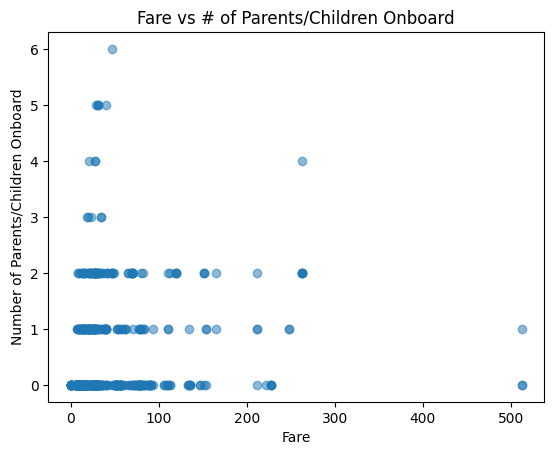

In [20]:
fare_parch_df = titanic_df[['Fare', 'Parch']].dropna()

plt.scatter(fare_parch_df['Fare'], fare_parch_df['Parch'], alpha=0.5)
plt.title('Fare vs # of Parents/Children Onboard')
plt.xlabel('Fare')
plt.ylabel('Number of Parents/Children Onboard')
plt.show()

Although not the most visually-appealing scatter ever made, this still has the potential to tell us something useful about our data. Particularly the part of the plot beginning at 3 parents/children. At that point, it appears the fare paid for each additional parent/child onboard increases reliably. This is obviously what we would expect to see so it is good to confirm that our dataset confirms our real-world knowledge. To see if the plot gets easier to read by transforming fare to a log scale, I will plot the same variables below:

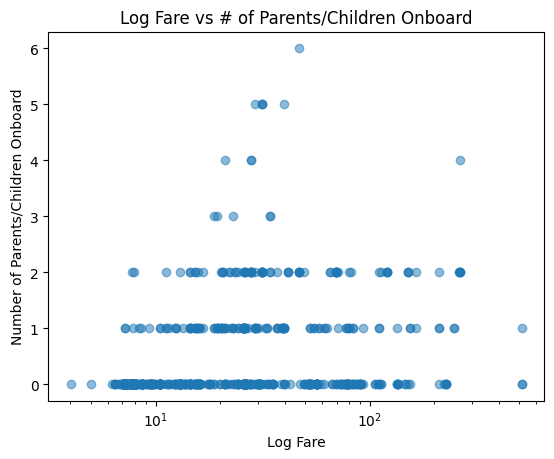

In [21]:
plt.scatter(fare_parch_df['Fare'], fare_parch_df['Parch'], alpha=0.5)
plt.xscale('log')
plt.title('Log Fare vs # of Parents/Children Onboard')
plt.xlabel('Log Fare')
plt.ylabel('Number of Parents/Children Onboard')
plt.show()

In [22]:
fare_parch_cov = fare_parch_df['Fare'].cov(fare_parch_df['Parch'])
fare_parch_corr, fp_pval = stats.pearsonr(fare_parch_df['Fare'], fare_parch_df['Parch'])

print(f'Covariance between Fare and Parch: {fare_parch_cov}\n',
      f'Correlation between Fare and Parch: {fare_parch_corr}\n'
      f'P value: {fp_pval}')

Covariance between Fare and Parch: 8.661051674926545
 Correlation between Fare and Parch: 0.2162249447707647
P value: 6.915291577876768e-11


The log fare transformation did make our scatter a little more understandable-- in general, the greater the number of parents/children on board for a given passenger, the more likely they are to have paid significantly more in fare. This is a simple yet solid finding that checks to make sure our dataset actually makes sense. The Pearson's r for this relationship was 0.22, a little bit stronger than the correlation between age and fare. Although the relationship most certainly exists for both pairs of variables, the relatively low r values suggests that there are likely many other factors likely at play. It is also possible that these relationships are not best described by a linear relationship and that their mere correlation does not imply a causal relationship. 

In [23]:
fare_class_df = titanic_df[['Fare', 'Pclass']].dropna()
fare_class_corr, fc_pval = stats.pearsonr(fare_class_df['Fare'], fare_class_df['Pclass'])

print(f'Correlation between Fare and Pclass: {fare_class_corr}/n', 
      f'P value: {fc_pval}')

Correlation between Fare and Pclass: -0.5494996199439077/n P value: 1.9673861734226358e-71


The above correlation confirms that as fare increases, the passenger ticket class decreases (decreasing ticket class get closer to 1st class, the most expensive). Given a fairly strong correlation between these variables, I feel okay to use ticket class as a proxy of fare paid (which is itself a proxy of passenger wealth) in a chi squared analysis to examine its relationship to whether the passenger survived or not. This saves me the hassle of having to subdivide fare into different categories like small, medium and large fare paid. 

In [24]:
chi_df = titanic_df[['Pclass', 'Survived']].dropna()
chi_table = pd.crosstab(chi_df['Pclass'], chi_df['Survived'])
print(chi_table)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [25]:
chi2_stat, p_val, dof, expected = chi2_contingency(chi_table)
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-squared Statistic: 102.88898875696056
P-value: 4.549251711298793e-23


The result of this chi squared analysis suggests a significant association between passenger ticket class and the likelihood that they survived the sinking of the Titanic. This is unsurprising given the collection of our previous findings.

For the final logistic regression: 
Target variable: Survived
Predictor variables: Fare, Age, Sex, Parch, Embarked,

Although I have not investigated embarked and sex previously, I am curious how much weight the logistic regression will give to these variables. I may build a second model with them excluded if they are not significant to the model. I will also fill missing values when I am able and it is reasonable (like missing values in Age will be filled with the median age). 

In [26]:
titanic_df.drop(['Name', 'Ticket', 'PassengerId', 'Pclass', 'SibSp', 'Ticket', 'Cabin'], axis = 1, inplace = True) # dropping all vars we don't want

In [27]:
titanic_df.dropna(subset=['Survived'], inplace = True) # dropping any missing NA's from the target variable to avoid an NA target

titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True) # fill missing age values with the median
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True) # fill missing fare values with the median
titanic_df = pd.get_dummies(titanic_df, columns = ['Embarked'], drop_first=True) #converting embarked categories into dummy variables
titanic_df['Embarked_Q'] = titanic_df['Embarked_Q'].astype(int) # pd.get_dummies returns bools which cannot be used in statsmodels logisitc regression,
titanic_df['Embarked_S'] = titanic_df['Embarked_S'].astype(int) # so we will convert them to integers here
titanic_df['Sex'] = titanic_df['Sex'].map({'male' : 0, 'female' : 1}) # convert sex into binary, male is 0 and female is 1

/var/folders/rm/1zt0rwk55mzcpp8mndvl0x3h0000gn/T/ipykernel_63661/390258331.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True) # fill missing age values with the median
/var/folders/rm/1zt0rwk55mzcpp8mndvl0x3h0000gn/T/ipykernel_63661/390258331.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because t

In [28]:
X = titanic_df[['Fare', 'Age', 'Parch', 'Embarked_S', 'Embarked_Q', 'Sex']]  
y = titanic_df['Survived']

X = sm.add_constant(X) # adding constant to predictors

In [29]:
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.483769
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Sun, 02 Mar 2025   Pseudo R-squ.:                  0.2735
Time:                        18:11:27   Log-Likelihood:                -431.04
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.401e-67
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8091      0.299     -2.710      0.007      -1.394      -0.224
Fare           0.0125      0.

In [30]:
predictions = logit_result.predict(X)
threshold = 0.5
predicted_binaries = [1 if p >= threshold else 0 for p in predictions]

accuracy = np.mean(predicted_binaries == y)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.7856


In [31]:
titanic_df = pd.read_csv(file_path) # resetting my original dataframe to contain all variables
c_df = titanic_df[['Age', 'Survived', 'Pclass']].dropna()
children = c_df[c_df['Age'] <= 12]

print("# Children: ", len(children))
print("Children survival rate: ", children['Survived'].sum() / len(children))

# Children:  69
Children survival rate:  0.5797101449275363


In [40]:
first_class_children = children[children['Pclass'].isin([1, 2])]
fcc_survived = first_class_children[first_class_children['Survived'] == 1]
fcc_rate = len(fcc_survived) / len(first_class_children)
num_fcc = len(first_class_children)

other_children = children[children['Pclass'] == 3]
other_ch_survived = other_children[other_children['Survived'] == 1]
other_rate = len(other_ch_survived) / len(other_children)

print("# of First and Second Class Children: ", num_fcc)
print("# of First and Second Class Children Survived: ", len(fcc_survived))
print("First and Second Class Children Survival Rate: ", fcc_rate)
print("# of Other Children: ", len(other_children))
print("# of Other Children Survived: ", len(other_ch_survived))
print("All Other Children Suvival Rate: ", other_rate)

# of First and Second Class Children:  21
# of First and Second Class Children Survived:  20
First and Second Class Children Survival Rate:  0.9523809523809523
# of Other Children:  48
# of Other Children Survived:  20
All Other Children Suvival Rate:  0.4166666666666667


In [37]:
survival_rate = titanic_df['Survived'].sum() / len(titanic_df)
print("Overall survival rate: ", survival_rate)

Overall survival rate:  0.3838383838383838
